In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [ ]:
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)
  return y1, y2

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

def plot_diff(y_true, y_pred, title=''):
  plt.scatter(y_true, y_pred)
  plt.title(title)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100, 100], [-100, 100])
  plt.show()


def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0, ylim)
  plt.plot(history.history[metric_name], color='blue', label=metric_name)
  plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
  plt.show()

### Prepare the Data

In [ ]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

train, test = train_test_split(df, test_size=0.2)
train
train_stats = train.describe()
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

norm_train_X = norm(train)
norm_test_X = norm(test)
train

,X1,X2,X3,X4,X5,X6,X7,X8
479,0.82,612.5,318.5,147.00,7.0,2,0.25,3
190,0.76,661.5,416.5,122.50,7.0,5,0.10,5
746,0.86,588.0,294.0,147.00,7.0,5,0.10,3
534,0.74,686.0,245.0,220.50,3.5,3,0.25,2
362,0.71,710.5,269.5,220.50,3.5,3,0.40,5
...,...,...,...,...,...,...,...,...
499,0.76,661.5,416.5,122.50,7.0,3,0.10,3
169,0.74,686.0,245.0,220.50,3.5,2,0.10,2
111,0.90,563.5,318.5,122.50,7.0,3,0.25,3
518,0.98,514.5,294.0,110.25,7.0,3,0.25,5


### Build the model

In [ ]:
input_layer = Input(shape=(len(train.columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)
y2_output = Dense(units='1', name='y2_output')(third_dense)

model = Model(inputs=input_layer, outputs=[y1_output, y2_output])
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 128)                  1152      ['input_2[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 128)                  16512     ['dense_3[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 64)                   8256      ['dense_4[0][0]']             
                                                                                            

### Configure parameters

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

### Train the model

In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs=100, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/100
62/62 [==============================] - 1s 7ms/step - loss: 0.5628 - y1_output_loss: 0.4333 - y2_output_loss: 0.1295 - y1_output_root_mean_squared_error: 0.6582 - y2_output_root_mean_squared_error: 0.3599 - val_loss: 340.1586 - val_y1_output_loss: 187.5606 - val_y2_output_loss: 152.5980 - val_y1_output_root_mean_squared_error: 13.6953 - val_y2_output_root_mean_squared_error: 12.3531
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4357 - y1_output_loss: 0.3133 - y2_output_loss: 0.1224 - y1_output_root_mean_squared_error: 0.5598 - y2_output_root_mean_squared_error: 0.3499 - val_loss: 334.8258 - val_y1_output_loss: 181.7676 - val_y2_output_loss: 153.0582 - val_y1_output_root_mean_squared_error: 13.4821 - val_y2_output_root_mean_squared_error: 12.3717
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5211 - y1_output_loss: 0.4114 - y2_output_loss: 0.1097 - y1_output_root_mean_squared_error: 0.6414 - y2_output_root_mean_square

In [ ]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 337.8030 - y1_output_loss: 185.1719 - y2_output_loss: 152.6311 - y1_output_root_mean_squared_error: 13.6078 - y2_output_root_mean_squared_error: 12.3544
Loss = 337.8030090332031, Y1_loss = 185.17189025878906, Y1_mse = 13.6077880859375, Y2_loss = 152.63113403320312, Y2_mse = 12.354397773742676


5/5 [==============================] - 0s 3ms/step


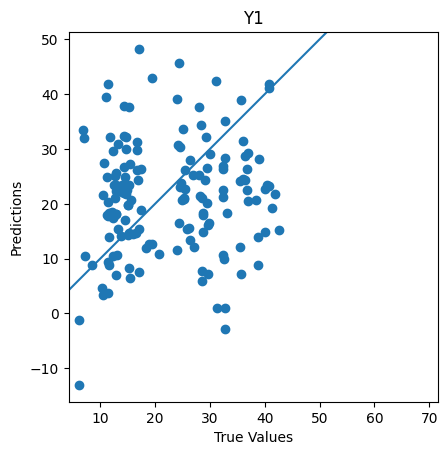

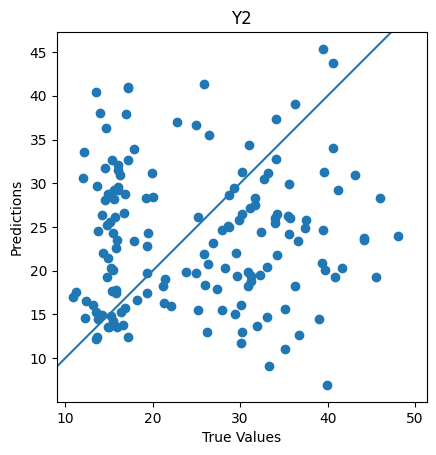

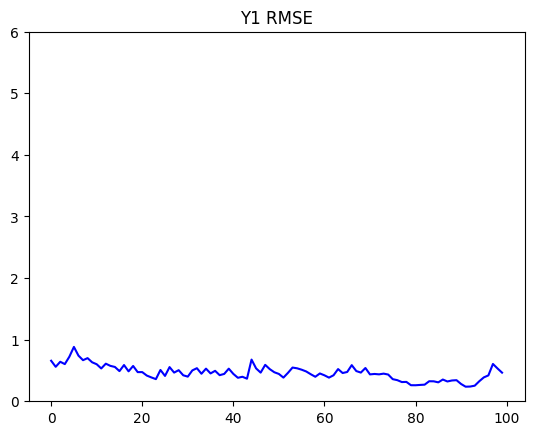

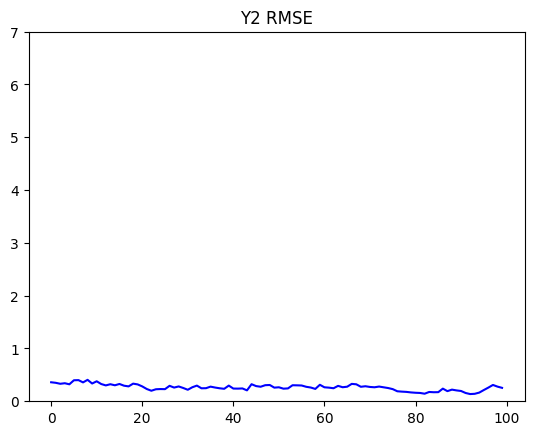

In [ ]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)